# README

This notebook shows how to run and parse FATCAT, a structural similarity calculator.

In [1]:
import ssbio.protein.structure.properties.fatcat as fatcat

In [2]:
import os.path as op
ROOT_DIR = '/home/nathan/projects_unsynced/fatcat_testing/'
OUT_DIR = op.join(ROOT_DIR, 'output')
FATCAT_SH = '/home/nathan/software/fatcat/runFATCAT.sh'

### Pairwise

In [3]:
fatcat_outfile = fatcat.run_fatcat(structure_path_1='/home/nathan/projects/iML1515_for_liz/structures/12as-A_clean.pdb', 
                                   structure_path_2='/home/nathan/projects/iML1515_for_liz/structures/1a9x-A_clean.pdb',
                                   outdir=OUT_DIR,
                                   fatcat_sh=FATCAT_SH)

In [4]:
fatcat.parse_fatcat(fatcat_outfile)

{'tm_score': 0.27}

### All-by-all

In [5]:
structs = ['/home/nathan/projects/iML1515_for_liz/structures/12as-A_clean.pdb', 
           '/home/nathan/projects/iML1515_for_liz/structures/1af6-A_clean.pdb',
           '/home/nathan/projects/iML1515_for_liz/structures/1a9x-A_clean.pdb']

In [6]:
tm_scores = fatcat.run_fatcat_all_by_all(structs, fatcat_sh=FATCAT_SH, outdir=OUT_DIR)
tm_scores

3it [00:00, 76.85it/s]


,12as-A_clean,1af6-A_clean,1a9x-A_clean
12as-A_clean,1.00,0.25,0.27
1af6-A_clean,0.25,1.00,0.14
1a9x-A_clean,0.27,0.14,1.00


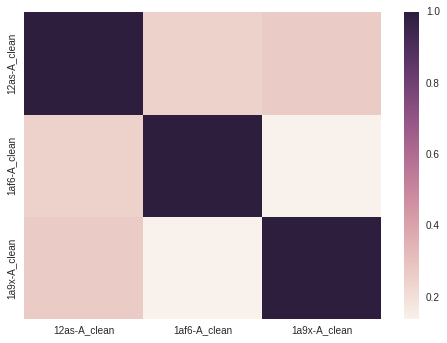

In [7]:
%matplotlib inline
import seaborn as sns
sns.heatmap(tm_scores)